In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, OneHotEncoder
pd.set_option('display.precision', 2)

In [9]:
pd.set_option('display.float_format', '{:.5f}'.format)

In [10]:
#Cargar el archivo
df = pd.read_csv("/content/movies_FINAL.csv")
print(df.head()) #La columna color no aporta información relevante, ya que se repite a lo largo del Dataframe

#Observar las columnas
df.columns


       director_name  num_critic_for_reviews  duration  \
0      James Cameron               723.00000 178.00000   
1     Gore Verbinski               302.00000 169.00000   
2         Sam Mendes               602.00000 148.00000   
3  Christopher Nolan               813.00000 164.00000   
4        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                  0.00000               855.00000  Joel David Moore   
1                563.00000              1000.00000     Orlando Bloom   
2                  0.00000               161.00000      Rory Kinnear   
3              22000.00000             23000.00000    Christian Bale   
4                131.00000                     NaN        Rob Walker   

   actor_1_facebook_likes                           genres     actor_1_name  \
0              1000.00000  Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1             40000.00000         Action|Adventure|Fantasy  

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'budget_filled', 'gross_filled'],
      dtype='object')

In [11]:
#Tamaño del dataframe
df.shape

(4364, 27)

In [12]:
#Analizar la distribución de las variables numéricas
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,budget_filled,gross_filled
count,4357.00000,4358.00000,4317.00000,4350.00000,4361.00000,4364.00000,4364.00000,4358.00000,4362.00000,4315.00000,4357.00000,4364.00000,4242.00000,4364.00000,4364.00000,4364.00000
mean,153.98829,109.06287,758.63285,695.63701,7108.00619,94554.21402,10516.66957,1.35521,304.82921,2001.86535,1808.83154,6.49363,2.15591,8438.19638,41730186.08410,48788559.14093
std,121.83906,23.50666,2959.53604,1740.08127,14939.01633,144304.50251,18274.59264,2.01851,391.98208,12.37560,4255.44823,1.07033,0.94839,20381.81279,210333017.22201,77696676.79072
min,1.00000,22.00000,0.00000,0.00000,0.00000,5.00000,0.00000,0.00000,1.00000,1916.00000,0.00000,1.60000,1.18000,0.00000,10.00000,13.00000
25%,64.00000,95.00000,10.00000,165.25000,678.00000,14612.00000,1633.75000,0.00000,90.00000,1998.00000,328.00000,5.90000,1.85000,0.00000,7975000.00000,5831902.25000
50%,125.00000,105.00000,57.00000,401.00000,1000.00000,44455.00000,3471.00000,1.00000,185.00000,2005.00000,637.00000,6.60000,2.35000,174.50000,20000000.00000,25119394.50000
75%,211.00000,120.00000,218.00000,655.00000,12000.00000,110841.75000,14982.25000,2.00000,364.75000,2010.00000,947.00000,7.20000,2.35000,10000.00000,46250000.00000,60808355.50000
max,813.00000,330.00000,23000.00000,23000.00000,640000.00000,1689764.00000,656730.00000,43.00000,5060.00000,2016.00000,137000.00000,9.50000,16.00000,349000.00000,12215500000.00000,2068223624.00000


In [13]:
#Visualizar el tipo de dato por columna
df.dtypes

,0
director_name,object
num_critic_for_reviews,float64
duration,float64
director_facebook_likes,float64
actor_3_facebook_likes,float64
actor_2_name,object
actor_1_facebook_likes,float64
genres,object
actor_1_name,object
movie_title,object


In [14]:
#Analizar varoles nulos
print(df.isnull().sum())
cantidad_nulos = df.isnull().sum().sum()
print("\nTotal de filas con datos nulos:", cantidad_nulos)

director_name                 47
num_critic_for_reviews         7
duration                       6
director_facebook_likes       47
actor_3_facebook_likes        14
actor_2_name                   7
actor_1_facebook_likes         3
genres                         0
actor_1_name                   3
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  14
facenumber_in_poster           6
plot_keywords                 48
movie_imdb_link                0
num_user_for_reviews           2
language                       9
country                        1
content_rating               103
title_year                    49
actor_2_facebook_likes         7
imdb_score                     0
aspect_ratio                 122
movie_facebook_likes           0
budget_filled                  0
gross_filled                   0
dtype: int64

Total de filas con datos nulos: 495


In [15]:
#seleccionar las columnas numéricas, pero no considerar la columna "Año", ya que principalmente se utilizan como identificadores categóricos
columnas_numericas = ['num_critic_for_reviews','num_user_for_reviews' ,'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross_filled', 'num_voted_users', 'cast_total_facebook_likes','budget_filled', 'actor_2_facebook_likes' ,'facenumber_in_poster' , 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

df_numericos = df.loc[:, columnas_numericas]
df_numericos.head()

,num_critic_for_reviews,num_user_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross_filled,num_voted_users,cast_total_facebook_likes,budget_filled,actor_2_facebook_likes,facenumber_in_poster,imdb_score,aspect_ratio,movie_facebook_likes
0,723.00000,3054.00000,178.00000,0.00000,855.00000,1000.00000,760505847.00000,886204,4834,237000000.00000,936.00000,0.00000,7.90000,1.78000,33000
1,302.00000,1238.00000,169.00000,563.00000,1000.00000,40000.00000,309404152.00000,471220,48350,300000000.00000,5000.00000,0.00000,7.10000,2.35000,0
2,602.00000,994.00000,148.00000,0.00000,161.00000,11000.00000,200074175.00000,275868,11700,245000000.00000,393.00000,1.00000,6.80000,2.35000,85000
3,813.00000,2701.00000,164.00000,22000.00000,23000.00000,27000.00000,448130642.00000,1144337,106759,250000000.00000,23000.00000,0.00000,8.50000,2.35000,164000
4,NaN,NaN,NaN,131.00000,NaN,131.00000,2068223624.00000,8,143,245000000.00000,12.00000,0.00000,7.10000,NaN,0


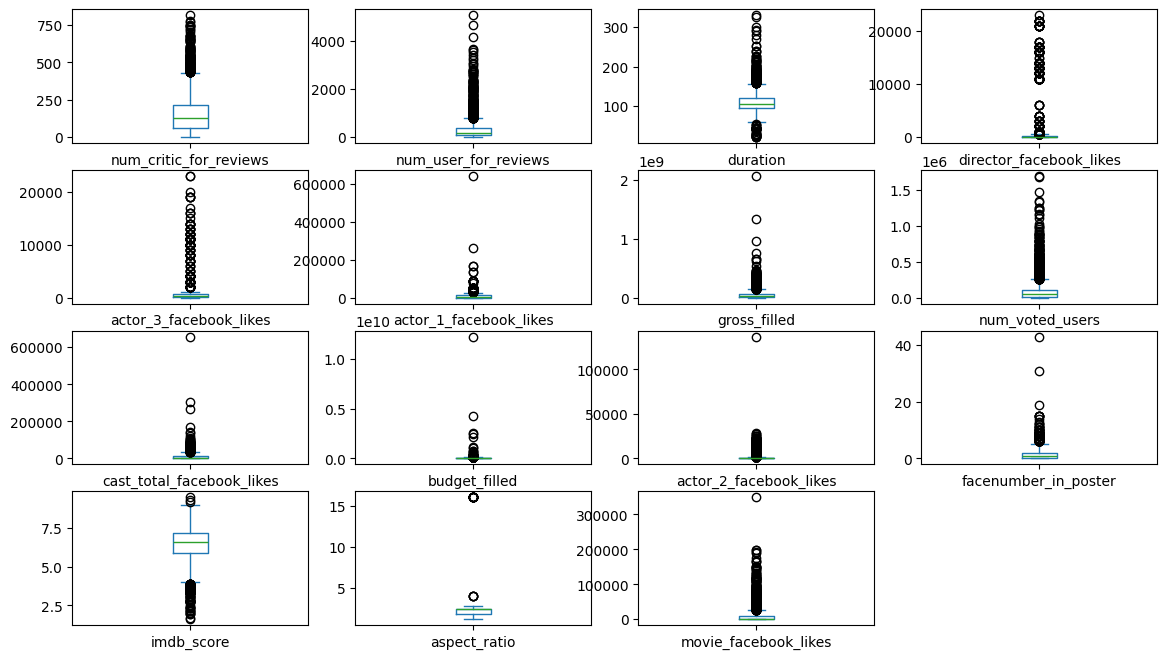

In [16]:
#Analizar la distribución de las variables numéricas
df_numericos.plot(kind='box',subplots=True, layout=(4,4), sharex=False,sharey=False, figsize=(14,8))
plt.show()

#Se observa que en todos los casos se presentan valores atípicos. Por lo tanto, para imputar, se debe de considerar la media
#Asimismo, al haber gran cantidad de datos atípicos en algunas variables, se utilizará RobustScaler

In [17]:
#Recorrer cada columna numérica y reemplazarla para
for i in df_numericos.columns:
  df[i] = df[i].fillna(df[i].median())

df.isnull().sum()

,0
director_name,47
num_critic_for_reviews,0
duration,0
director_facebook_likes,0
actor_3_facebook_likes,0
actor_2_name,7
actor_1_facebook_likes,0
genres,0
actor_1_name,3
movie_title,0


In [18]:
#Analizar los valores únicos de las columnas cualitativas
columnas_cualitativas =  ["director_name", "actor_2_name","actor_1_name", "actor_3_name", "language", "country","content_rating", "movie_title", "genres"]

contador_valor_unico = []

for i in columnas_cualitativas:
  contador_valor_unico.append(len(df[i].unique()))

print(contador_valor_unico)

#Las columnas director, actor1, actor2, actor3 y nombre de película tienen demasiados valores únicos, por lo que, para el caso de PCA, no se considerarán.
#El país en el que se produjo la película puede resultar ser una variable relevante, por lo que, para evitar tener muchos valores únicos, se agrupa en continente.
#Idioma también cuenta con muchos valores únicos y, en su mayoría, suele estar estrechamente ligado a país.
#La variable de clasificación de la película resulta importante, ya que impacta directamente a la taquilla.


[1963, 2584, 1745, 3034, 41, 55, 17, 4286, 848]


In [19]:
df["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Japan',
       'Germany', 'China', 'France', 'New Line', 'Mexico', 'Spain',
       'Hong Kong', 'Czech Republic', 'South Korea', 'Peru', 'India',
       'Italy', 'Russia', 'Aruba', 'Denmark', 'Libya', 'Belgium',
       'Ireland', 'South Africa', 'Switzerland', 'Romania',
       'West Germany', 'Chile', 'Netherlands', 'Hungary', 'Panama',
       'Greece', 'Taiwan', 'Official site', 'Thailand', 'Slovakia',
       'Bulgaria', 'Iran', 'Poland', 'Georgia', 'Iceland', 'Norway',
       'Brazil', 'Finland', 'Sweden', 'Argentina', 'Colombia', 'Israel',
       'Egypt', 'Indonesia', 'Pakistan', 'Afghanistan', 'Philippines'],
      dtype=object)

In [20]:
#Existen dos valores sin sentido: New line y Official site, los cuales no son países
#Analizar a qué películas pertenecen

df[(df["country"] == "Official site") | (df["country"] == "New Line") ]["movie_title"]

,movie_title
276,Town & Country
2575,Country Strong


In [21]:
df[df["country"].isnull()]["movie_title"]

,movie_title
4,Star Wars: Episode VII - The Force Awakens ...


In [22]:
#La variable contry tiene 1 variable nula, por lo que se imputarán con los valores correctos (no con la moda)
#También se imputará las películas de los países inexistentes

#Analizar los títulos de las películas de esas 4 filas
df[df["country"].isnull()]["movie_title"]

# Reemplazar manualmente según el título
df.loc[df["movie_title"].str.contains("Star Wars: Episode VII", case=False), "country"] = "USA"
df.loc[df["movie_title"].str.contains("Town & Country", case=False), "country"] = "USA"
df.loc[df["movie_title"].str.contains("Country Strong", case=False), "country"] = "USA"

#Verificar la cantidad de nulos en país
print(df["country"].isnull().sum())

#Ahora, se agrupa los países por continente y se crea la nueva columna

paises_agrupados = [
    df["country"].isin(["USA", "Canada", "Mexico", "Panama", "Bahamas", "Dominican Republic"]),
    df["country"].isin(["Peru", "Chile", "Brazil", "Argentina", "Colombia", "Venezuela", "Aruba"]),
    df["country"].isin(["UK", "France", "Germany", "Italy", "Spain", "Ireland", "Netherlands",
                        "Belgium", "Switzerland", "Sweden", "Norway", "Denmark", "Poland",
                        "Romania", "Hungary", "Greece", "Finland", "Iceland", "Czech Republic",
                        "Slovakia", "Bulgaria", "Slovenia", "Russia", "Georgia", "Turkey",
                        "West Germany", "Soviet Union"]),
    df["country"].isin(["China", "Japan", "India", "South Korea", "Hong Kong", "Thailand",
                        "Cambodia", "Taiwan", "Indonesia", "Philippines", "Pakistan", "Afghanistan",
                        "Iran", "Israel", "United Arab Emirates", "Kyrgyzstan"]),
    df["country"].isin(["Australia", "New Zealand"]),
    df["country"].isin(["South Africa", "Nigeria", "Egypt", "Libya", "Kenya", "Cameroon"])
]

continentes = ["North America", "South America", "Europe", "Asia", "Oceania", "Africa"]

df["continent"] = np.select(paises_agrupados, continentes, default = "others")
df["continent"].unique()

0


array(['North America', 'Europe', 'Oceania', 'Asia', 'South America',
       'Africa'], dtype=object)

In [23]:
print(df["content_rating"].unique())
#Esta columna tiene casi 300 valores nulos, por lo que se imputará con Unrated, es decir, sin calificación

df["content_rating"].fillna("Unrated", inplace = True)
df["content_rating"] = df["content_rating"].replace("Not Rated", "Unrated")

print(df["content_rating"].isnull().sum())
print(df["content_rating"].unique())

['PG-13' nan 'PG' 'G' 'R' 'TV-14' 'TV-PG' 'TV-MA' 'TV-G' 'Not Rated'
 'Approved' 'NC-17' 'X' 'Unrated' 'GP' 'Passed' 'M']
0
['PG-13' 'Unrated' 'PG' 'G' 'R' 'TV-14' 'TV-PG' 'TV-MA' 'TV-G' 'Approved'
 'NC-17' 'X' 'GP' 'Passed' 'M']


/tmp/ipython-input-3066318364.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["content_rating"].fillna("Unrated", inplace = True)


In [24]:
# Definir condiciones booleanas
condiciones = [
    df["content_rating"].isin(["G", "PG", "TV-G", "TV-PG", "GP", "Approved", "Passed"]),
    df["content_rating"].isin(["PG-13", "TV-14"]),
    df["content_rating"].isin(["R", "NC-17", "X", "M", "TV-MA"]),
    df["content_rating"].isin(["Unrated"])
]

# Cateogorías a asignar
categorias = ["Family", "Teen", "Adult", "Unrated"]

# Crear columna agrupada
df["CR_grouped"] = np.select(condiciones, categorias, default = "Other")

# Verificar
print(df["CR_grouped"].unique())

['Teen' 'Unrated' 'Family' 'Adult']


In [25]:
#Crear una nueva columna llamada Aprox_Profit, ya que, en realidad, este no indica la ganancia real, pero sí es un aproximado
#Esto debido a que no se están considerando otros costos externos como distribución y marketing.
#En muchas ocasiones, los estudios no publican estos costos adicionales.
#Esta forma de cálculo es bastante común en la industria del cine.

df['Aprox_profit'] = df['gross_filled'] - df['budget_filled']
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'budget_filled', 'gross_filled', 'continent',
       'CR_grouped', 'Aprox_profit'],
      dtype='object')

In [26]:
#Eliminar columnas que no se emplearán en el PCA:

df_PCA = df.drop(columns = ["director_name","plot_keywords" ,"movie_imdb_link", "actor_2_name","actor_1_name", "actor_3_name", "movie_title", "title_year", "country","budget_filled", "gross_filled" , "language", "genres", "content_rating"])
df_PCA.shape


(4364, 16)

In [27]:
#Ver los tipos de datos que se mantuvieron
df_PCA.dtypes

,0
num_critic_for_reviews,float64
duration,float64
director_facebook_likes,float64
actor_3_facebook_likes,float64
actor_1_facebook_likes,float64
num_voted_users,int64
cast_total_facebook_likes,int64
facenumber_in_poster,float64
num_user_for_reviews,float64
actor_2_facebook_likes,float64


In [28]:
#Las variables Continent y CR_grouped son cualitativas nominales, por lo que se pasarán a dummies por medio de OneHotEncoder
df_atributos = df_PCA[["continent", "CR_grouped"]]

codificador = OneHotEncoder(sparse_output = False)
codificador.fit(df_atributos)
df_atributos = codificador.transform(df_atributos)

df_atributos = pd.DataFrame(data = df_atributos, columns = codificador.get_feature_names_out(), index = df_PCA.index )

df_PCA.drop(columns = ["continent","CR_grouped"], inplace = True)

df_PCA = pd.concat([df_PCA, df_atributos], axis = 1)
print(df_PCA.shape)

(4364, 24)


In [29]:
print(df_PCA.head())

   num_critic_for_reviews  duration  director_facebook_likes  \
0               723.00000 178.00000                  0.00000   
1               302.00000 169.00000                563.00000   
2               602.00000 148.00000                  0.00000   
3               813.00000 164.00000              22000.00000   
4               125.00000 105.00000                131.00000   

   actor_3_facebook_likes  actor_1_facebook_likes  num_voted_users  \
0               855.00000              1000.00000           886204   
1              1000.00000             40000.00000           471220   
2               161.00000             11000.00000           275868   
3             23000.00000             27000.00000          1144337   
4               401.00000               131.00000                8   

   cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
0                       4834               0.00000            3054.00000   
1                      48350              

In [30]:
df_PCA.isnull().sum()

,0
num_critic_for_reviews,0
duration,0
director_facebook_likes,0
actor_3_facebook_likes,0
actor_1_facebook_likes,0
num_voted_users,0
cast_total_facebook_likes,0
facenumber_in_poster,0
num_user_for_reviews,0
actor_2_facebook_likes,0


###**PCA**

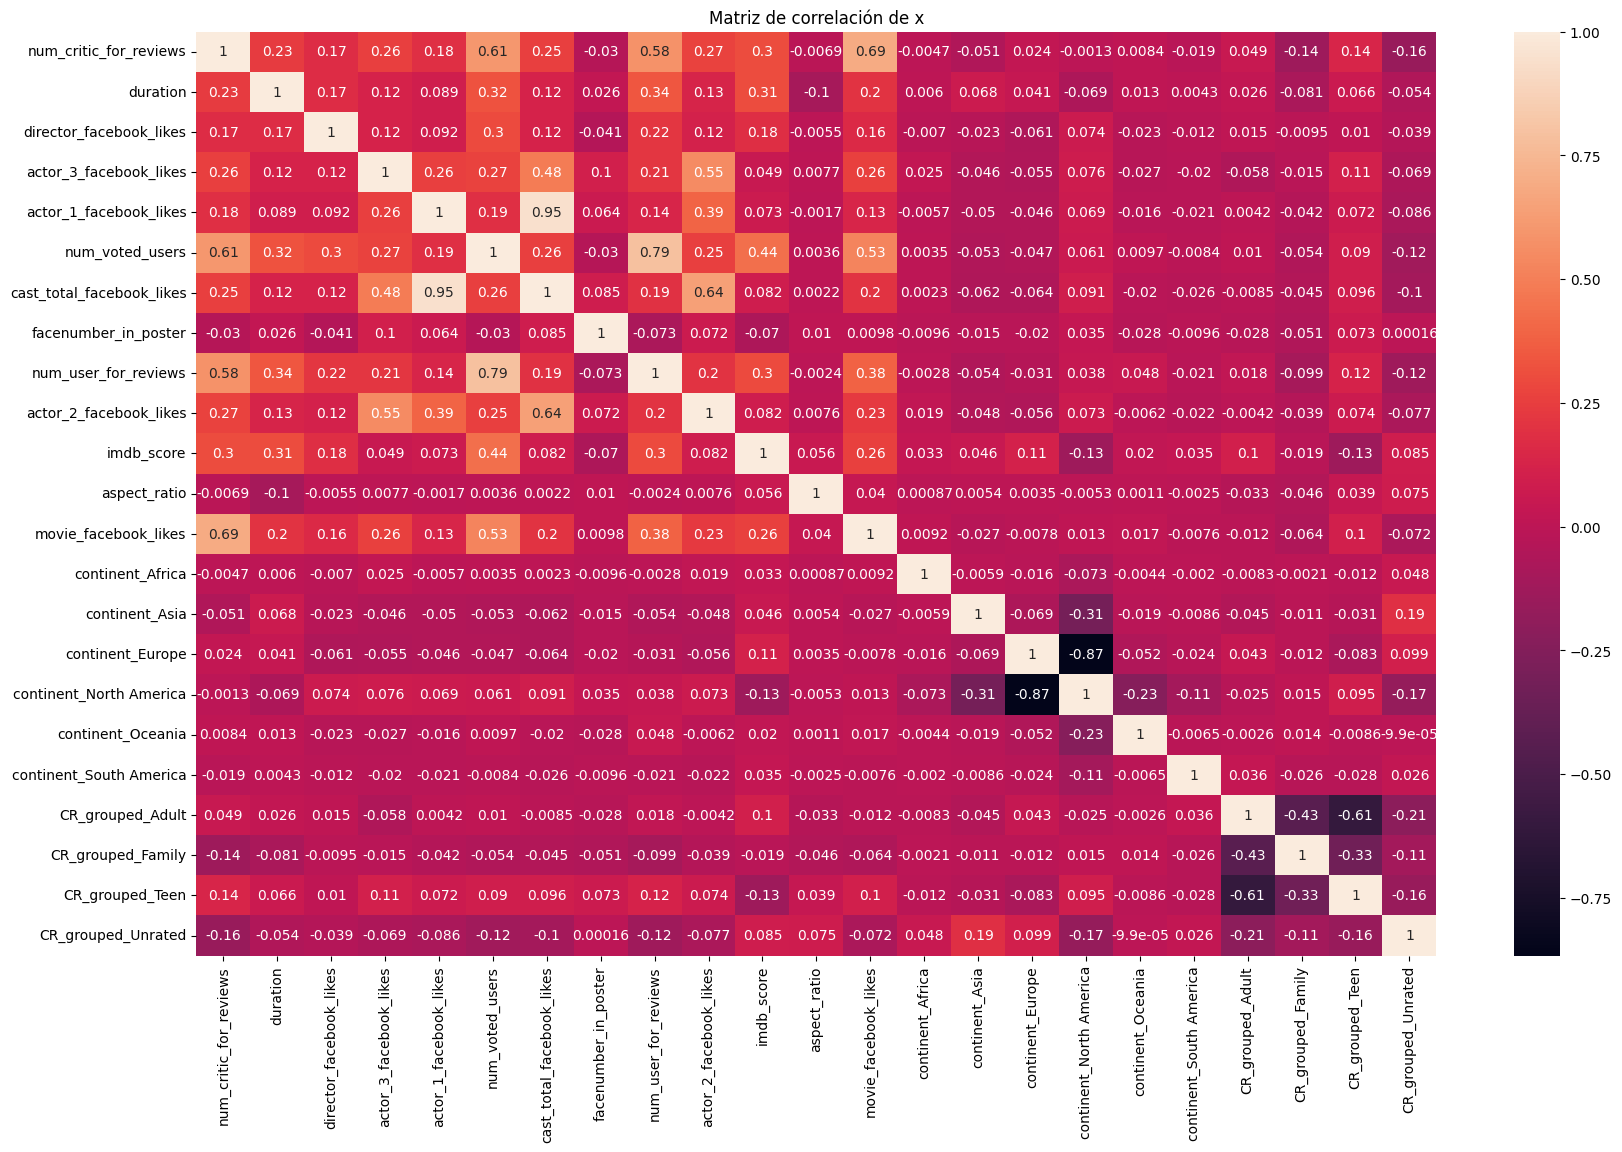

In [31]:
#analizar matriz de correlación
plt.figure(figsize=(20, 12))
sns.heatmap(df_PCA.drop(columns="Aprox_profit").corr(), annot = True)
plt.title("Matriz de correlación de x")
plt.show()

In [32]:
#identificar las variables dummies
dummy_cols = []

for columna in df_PCA.columns:
  if columna.startswith("continent_") or columna.startswith("CR_grouped_"):
    dummy_cols.append(columna)

# Separar numéricas (excluyendo target y dummies)
X_num = df_PCA.drop(columns=dummy_cols + ["Aprox_profit"])

# Escalar solo numéricas
scaler = RobustScaler()
X_num_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    columns=X_num.columns,
    index=df_PCA.index
)

# Concatenar de nuevo numéricas escaladas + categóricas dummies
x = pd.concat([X_num_scaled, df_PCA[dummy_cols]], axis=1)
y = df_PCA["Aprox_profit"]

print(x.shape)
print(y.shape)


(4364, 23)
(4364,)


In [33]:
x.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,actor_2_facebook_likes,...,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,CR_grouped_Adult,CR_grouped_Family,CR_grouped_Teen,CR_grouped_Unrated
0,4.10997,2.92000,-0.27941,0.93033,0.00000,8.74728,0.10211,-0.50000,10.46126,0.48421,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,1.21649,2.56000,2.48039,1.22746,3.44462,4.43486,3.36210,-0.50000,3.83956,7.06559,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
2,3.27835,1.72000,-0.27941,-0.49180,0.88324,2.40480,0.61647,0.00000,2.94986,-0.39514,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
3,4.72852,2.36000,107.56373,46.30943,2.29641,11.42975,7.73780,-0.50000,9.17411,36.21538,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
4,0.00000,0.00000,0.36275,0.00000,-0.07675,-0.46188,-0.24932,-0.50000,0.00000,-1.01215,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


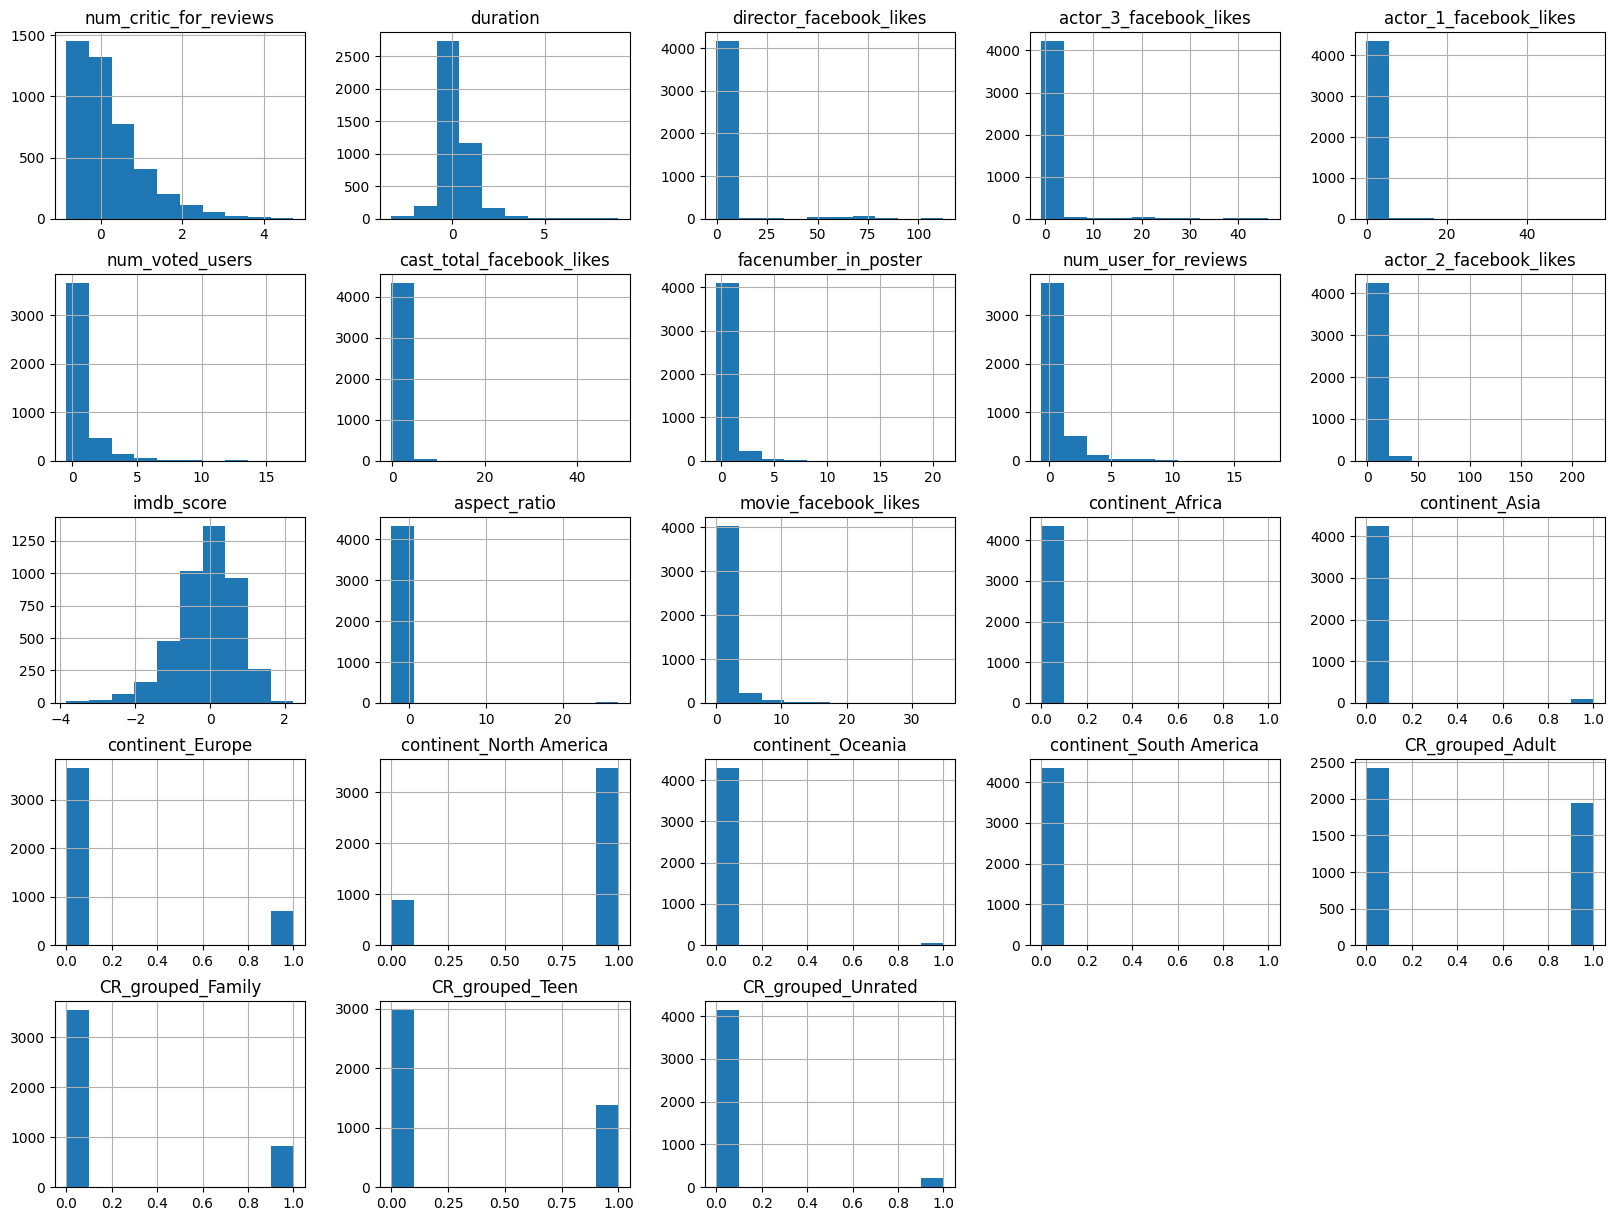

In [34]:
x.hist(bins=10,figsize=(20,15))
plt.show()

In [35]:
x.skew()

,0
num_critic_for_reviews,1.47370
duration,1.84087
director_facebook_likes,4.94611
actor_3_facebook_likes,6.90409
actor_1_facebook_likes,20.09196
num_voted_users,3.84185
cast_total_facebook_likes,13.02560
facenumber_in_poster,4.70036
num_user_for_reviews,4.01679
actor_2_facebook_likes,9.59151


In [36]:
#aplicar PCA
pca = PCA(n_components=10)
fit_pca = pca.fit(x)
x_transformed_pca = fit_pca.transform(x)

In [37]:
x_transformed_pca

array([[-3.12338960e+00,  2.10273591e-01,  4.33085387e+00, ...,
         3.40638035e-01, -7.99387862e-01, -1.60625511e+00],
       [-1.95555261e-01,  5.99335587e+00, -8.14518618e-02, ...,
        -1.24464967e-01,  8.71533110e-01, -8.36839864e-01],
       [-3.51626777e+00, -1.23265902e+00,  2.62887541e+00, ...,
        -4.14422066e-03,  5.24599091e-01, -1.59097468e+00],
       ...,
       [-4.01845890e+00, -3.09596043e+00, -6.65135189e-01, ...,
        -8.00249208e-01, -4.92753723e-01,  9.90646938e-01],
       [-4.01531952e+00, -2.76412251e+00, -6.35505901e-01, ...,
        -2.19421803e-01, -5.78832318e-02,  3.13974862e-01],
       [-3.95887739e+00, -3.11887905e+00, -7.16775115e-01, ...,
        -7.72114768e-01, -2.39010910e-01,  4.34548070e-01]])

In [38]:
fit_pca.explained_variance_ratio_

array([0.7285547 , 0.18236104, 0.02887742, 0.01849117, 0.01221668,
       0.00863198, 0.00721562, 0.003476  , 0.00275127, 0.0020297 ])

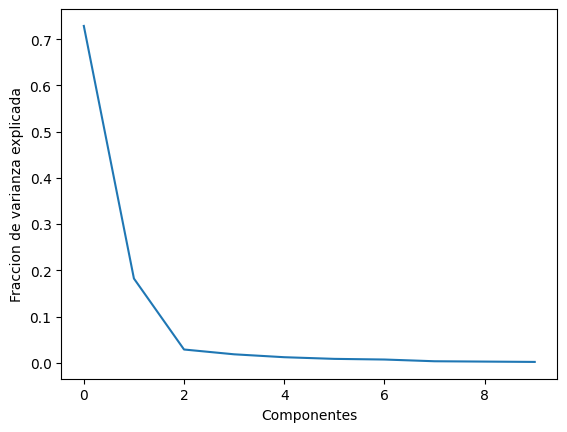

In [39]:
plt.plot( fit_pca.explained_variance_ratio_ )
plt.xlabel('Componentes')
plt.ylabel('Fraccion de varianza explicada')
plt.show()

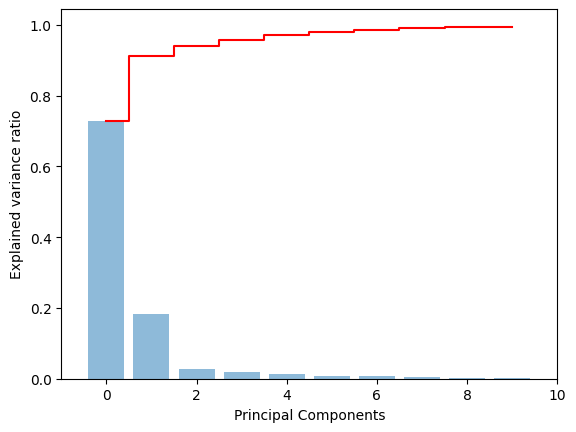

In [40]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.bar(range(0,len(fit_pca.explained_variance_ratio_)), fit_pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(0,len(fit_pca.explained_variance_ratio_)), np.cumsum(fit_pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.xlim(-1,10)
plt.show()

In [41]:
print(fit_pca.explained_variance_ratio_[0:5]*100)

[72.85547004 18.23610432  2.88774219  1.84911742  1.2216676 ]


In [42]:
print('explained_variance_ratio: {:.2f}%'.format(fit_pca.explained_variance_ratio_[0:2].sum()*100))

explained_variance_ratio: 91.09%


#Visualizando los datos transformados

In [43]:
x_transformed_pca=pd.DataFrame(x_transformed_pca,columns=range(0,10))
y = pd.Series(y, name="Aprox_profit").reset_index(drop=True)
print(x_transformed_pca.shape)
print(y.shape)

(4364, 10)
(4364,)


In [44]:
df_new =  pd.concat([x_transformed_pca[[0, 1]],y],axis=1)
df_new = df_new.rename(columns={0:'PC1',1:'PC2'})
df_new

,PC1,PC2,Aprox_profit
0,-3.12339,0.21027,523505847.00000
1,-0.19556,5.99336,9404152.00000
2,-3.51627,-1.23266,-44925825.00000
3,109.12409,40.08487,198130642.00000
4,-3.34794,-2.89413,1823223624.00000
...,...,...,...
4359,-2.51692,-2.97574,417760.00000
4360,-4.05850,-3.18254,63071.00000
4361,-4.01846,-3.09596,2033920.00000
4362,-4.01532,-2.76412,-4416.00000


In [45]:
cargas_pca = pd.DataFrame(
    fit_pca.components_[:2],
    columns=x.columns,
    index=['PC1', 'PC2'])

cargas_pca

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,actor_2_facebook_likes,...,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,CR_grouped_Adult,CR_grouped_Family,CR_grouped_Teen,CR_grouped_Unrated
PC1,0.01109,0.01147,0.99490,0.03729,0.01020,0.03254,0.01437,-0.00259,0.02295,0.07682,...,-0.00002,-0.00027,-0.00161,0.00213,-0.00019,-0.00005,0.00049,-0.00032,0.00048,-0.00065
PC2,0.03230,0.01517,-0.09098,0.31765,0.07449,0.05137,0.12458,0.01255,0.04014,0.92677,...,0.00011,-0.00104,-0.00255,0.00373,-0.00009,-0.00016,-0.00107,-0.00218,0.00565,-0.00240


from matplotlib import pyplot as plt
_df_0['num_critic_for_reviews'].plot(kind='hist', bins=20, title='num_critic_for_reviews')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['director_facebook_likes'].plot(kind='hist', bins=20, title='director_facebook_likes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['actor_3_facebook_likes'].plot(kind='hist', bins=20, title='actor_3_facebook_likes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='num_critic_for_reviews', y='duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='duration', y='director_facebook_likes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='director_facebook_likes', y='actor_3_facebook_likes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='actor_3_facebook_likes', y='actor_1_facebook_likes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['num_critic_for_reviews']
  ys = series['director_facebook_likes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('num_critic_for_reviews', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('num_critic_for_reviews')
_ = plt.ylabel('director_facebook_likes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['num_critic_for_reviews']
  ys = series['imdb_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('num_critic_for_reviews', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('num_critic_for_reviews')
_ = plt.ylabel('imdb_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['num_critic_for_reviews']
  ys = series['continent_Asia']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('num_critic_for_reviews', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('num_critic_for_reviews')
_ = plt.ylabel('continent_Asia')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['num_critic_for_reviews']
  ys = series['continent_Europe']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('num_critic_for_reviews', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('num_critic_for_reviews')
_ = plt.ylabel('continent_Europe')

from matplotlib import pyplot as plt
_df_13['num_critic_for_reviews'].plot(kind='line', figsize=(8, 4), title='num_critic_for_reviews')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['director_facebook_likes'].plot(kind='line', figsize=(8, 4), title='director_facebook_likes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['actor_3_facebook_likes'].plot(kind='line', figsize=(8, 4), title='actor_3_facebook_likes')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='num_critic_for_reviews', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='duration', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='director_facebook_likes', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='actor_3_facebook_likes', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)